In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('..')
import functions.helperfunctions as hf

In [2]:
ff1 = 'data/output/pairing_GAMI/lev20_repair_screen/'

In [3]:
def _manipulate_MI_results(f):
    results, N = hf.load_df_TPR(f)
    results = pd.DataFrame(np.array(np.array([x for x in results])))
    its = results.shape[1]-1
    results['test_size'] = N
    results['final_test_prop'] = results[its] / N

    return(results)

In [4]:
allresults = []
for f in os.listdir(ff1):
    if ('.csv' in f) & ('MI_repeats-10' in f):
        print(f)
        f1 = f.replace('small_ind', 'smallInd')
        f1 = f1.replace('prop_test', 'propTest')
        properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '-' in x}
        results = _manipulate_MI_results(ff1 + f)
        results['repair'] = properties['repairing']
        results['GA-thresh'] = properties['GAthresh']
        results['Epitope'] = properties['epitope']
        allresults.append(results)

epitope-YLQPRTFLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.0_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
epitope-GLCTLVAML_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.0_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
epitope-GLCTLVAML_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
epitope-GLCTLVAML_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-False_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
epitope-YLQPRTFLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_tran

In [5]:
all_results = pd.concat(allresults)

In [6]:
Rmelt = pd.melt(all_results, id_vars = ['repair', 'GA-thresh', 'final_test_prop', 'test_size', 'Epitope'])

In [7]:
print(Rmelt)

     repair GA-thresh  final_test_prop  test_size    Epitope variable  value
0      True       0.0         0.084084        333  YLQPRTFLL        0   24.0
1      True       0.0         0.084084        333  YLQPRTFLL        0   24.0
2      True       0.0         0.084084        333  YLQPRTFLL        0   24.0
3      True       0.0         0.084084        333  YLQPRTFLL        0   24.0
4      True       0.0         0.084084        333  YLQPRTFLL        0   24.0
...     ...       ...              ...        ...        ...      ...    ...
3535  False      0.95         0.073171        328  YLQPRTFLL       58    NaN
3536  False      0.95         0.094512        328  YLQPRTFLL       58    NaN
3537  False      0.95         0.076220        328  YLQPRTFLL       58    NaN
3538  False      0.95         0.094512        328  YLQPRTFLL       58    NaN
3539  False      0.95         0.100610        328  YLQPRTFLL       58    NaN

[3540 rows x 7 columns]


In [8]:
# add two columns so when repair == False I can still compare results
Rmelt['correct_to_add'] = 0
Rmelt['GA_training_size'] = 0

Get the precomputed GAs that I am using to plot GA performance

In [9]:
ff2 = 'data/output/pairing_GA/all_eps/'
GA_performance={}

for ep in Rmelt['Epitope'].unique():
    print(ep)
    GA = pd.read_csv(ff2 + 'GA-epitope-'+ep+'_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz', index_col=0)

    # find how many are over threshold - fix to use top 5
    overthresh = GA.loc[GA['mode_freq']>=0.95*len([x for x in GA.columns if 'repeat' in x])]
    if overthresh.shape[0] < 5:
        overthresh = GA.sort_values(by='mode_freq', ascending=False).head()
    print(overthresh)
    num_correct_in_training = overthresh.loc[overthresh['correct'] == True].shape[0]
    Rmelt.loc[(Rmelt['Epitope'] == ep) & (Rmelt['GA-thresh'] == '0.95') & (Rmelt['repair'] == 'False'),'correct_to_add'] = num_correct_in_training
    Rmelt.loc[(Rmelt['Epitope'] == ep) & (Rmelt['GA-thresh'] == '0.95') & (Rmelt['repair'] == 'False'), 'GA_training_size'] = overthresh.shape[0]

    GA_performance[ep] = GA.loc[GA['correct'] == True].shape[0]

YLQPRTFLL
              repeat1           repeat2           repeat3           repeat4  \
206     CASSDLNTGELFF     CASSDLNTGELFF     CASSDLNTGELFF     CASSDLNTGELFF   
204  CSARDEKATNTGELFF  CSARDEKATNTGELFF  CSARDEKATNTGELFF  CSARDEKATNTGELFF   
242  CSARDPRAQNTGELFF  CSARDPRAQNTGELFF  CSARDPRAQNTGELFF  CSARDPRAQNTGELFF   
200  CASSPGTTLAKNIQYF  CASSPGTTLAKNIQYF    CASIRDHNTGELFF  CASSPGTTLAKNIQYF   
219     CASSDLNTGELFF     CASSDLNTGELFF     CASSDLNTGELFF     CASSDLNTGELFF   

              repeat5           repeat6           repeat7           repeat8  \
206     CASSDLNTGELFF     CASSDLNTGELFF     CASSDLNTGELFF     CASSDLNTGELFF   
204  CSARDEKATNTGELFF  CSARDEKATNTGELFF  CSARDEKATNTGELFF  CSARDEKATNTGELFF   
242  CSARDPRAQNTGELFF  CSARDPRAQNTGELFF  CSARDPRAQNTGELFF  CSARDPRAQNTGELFF   
200  CASSPGTTLAKNIQYF  CASSPGTTLAKNIQYF  CASSPGTTLAKNIQYF  CASSPGTTLAKNIQYF   
219     CASSDLNTGELFF     CASSDLNTGELFF     CASSDLNTGELFF       CASSLDIEAFF   

              repeat9          repeat10 

In [10]:
ff3 = 'data/output/pairing_MI-IPA/all_eps_noconf/'
mi_results={}

for ep in Rmelt['Epitope'].unique():
    print(ep)
    MI = _manipulate_MI_results(ff3 + 'epitope-'+ep+'_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz')
    bc = _manipulate_MI_results(ff3 + 'epitope-'+ep+'_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz')

    MI['type'] = 'MI-IPA'
    bc['type'] = 'no learning'

    r = pd.concat([MI, bc])
    R = pd.melt(r, id_vars = ['type', 'final_test_prop', 'test_size'])
    mi_results[ep] = R

YLQPRTFLL


GLCTLVAML


In [11]:
mi_results

{'YLQPRTFLL':              type  final_test_prop  test_size variable  value
 0          MI-IPA         0.075075        333        0   12.0
 1          MI-IPA         0.096096        333        0   24.0
 2          MI-IPA         0.039039        333        0   13.0
 3          MI-IPA         0.102102        333        0   23.0
 4          MI-IPA         0.057057        333        0   16.0
 ...           ...              ...        ...      ...    ...
 1135  no learning         0.036036        333       56   12.0
 1136  no learning         0.039039        333       56   13.0
 1137  no learning         0.036036        333       56   12.0
 1138  no learning         0.042042        333       56   14.0
 1139  no learning         0.030030        333       56   10.0
 
 [1140 rows x 5 columns],
 'GLCTLVAML':              type  final_test_prop  test_size variable  value
 0          MI-IPA         0.194203        345        0   57.0
 1          MI-IPA         0.202899        345        0   54.0
 

Lineplots for everything

In [12]:
Rmelt['N'] = Rmelt['GA_training_size'] + Rmelt['test_size']
Rmelt['overall_correct'] = Rmelt['value'] + Rmelt['correct_to_add']

In [13]:
Rmelt

,repair,GA-thresh,final_test_prop,test_size,Epitope,variable,value,correct_to_add,GA_training_size,N,overall_correct
0,True,0.0,0.084084,333,YLQPRTFLL,0,24.0,0,0,333,24.0
1,True,0.0,0.084084,333,YLQPRTFLL,0,24.0,0,0,333,24.0
2,True,0.0,0.084084,333,YLQPRTFLL,0,24.0,0,0,333,24.0
3,True,0.0,0.084084,333,YLQPRTFLL,0,24.0,0,0,333,24.0
4,True,0.0,0.084084,333,YLQPRTFLL,0,24.0,0,0,333,24.0
...,...,...,...,...,...,...,...,...,...,...,...
3535,False,0.95,0.073171,328,YLQPRTFLL,58,NaN,2,5,333,NaN
3536,False,0.95,0.094512,328,YLQPRTFLL,58,NaN,2,5,333,NaN
3537,False,0.95,0.076220,328,YLQPRTFLL,58,NaN,2,5,333,NaN
3538,False,0.95,0.094512,328,YLQPRTFLL,58,NaN,2,5,333,NaN


In [14]:
GA_performance

{'YLQPRTFLL': 28, 'GLCTLVAML': 87}

/tmp/ipykernel_1022202/4046194518.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['type'] = 'GA+MI-IPA, repair = ' + df1['repair'].astype('str')
/tmp/ipykernel_1022202/4046194518.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['type'] = 'GA+MI-IPA, repair = ' + df2['repair'].astype('str')
/tmp/ipykernel_1022202/4046194518.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

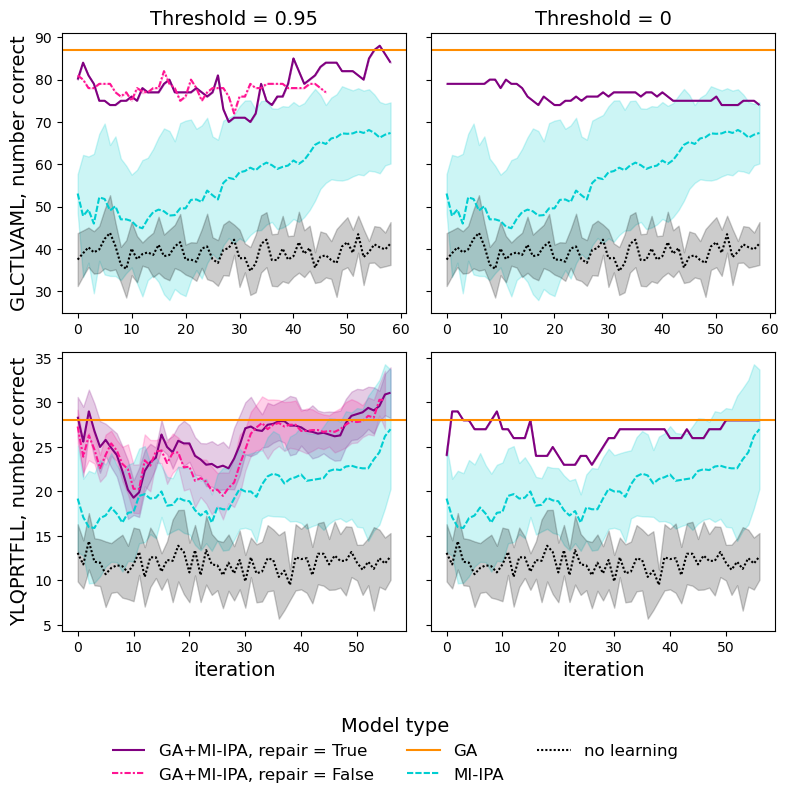

In [15]:
Rmelt['prop'] = Rmelt['value']/Rmelt['test_size']

fig, ax = plt.subplots(figsize=(8,7), ncols=2, nrows=2, sharex='row', sharey = 'row')

for i,ep in enumerate(sorted(Rmelt['Epitope'].unique())):
    df1 = Rmelt.loc[(Rmelt['Epitope'] == ep) & (Rmelt['GA-thresh'] == '0.95')]
    df2 = Rmelt.loc[(Rmelt['Epitope'] == ep) & (Rmelt['GA-thresh'] == '0.0')]
    df1['type'] = 'GA+MI-IPA, repair = ' + df1['repair'].astype('str')
    df2['type'] = 'GA+MI-IPA, repair = ' + df2['repair'].astype('str')
    sns.lineplot(df1, hue = 'type', style='type', x = 'variable', y = 'overall_correct', errorbar='sd', ax=ax[i,0],
                 style_order = ['GA+MI-IPA, repair = True', 'GA+MI-IPA, repair = False'], 
                 hue_order = ['GA+MI-IPA, repair = True', 'GA+MI-IPA, repair = False'], 
                 palette = ['purple', 'deeppink'], dashes = [(1,0),(3,1,1,1)])
    sns.lineplot(df2, hue = 'type', style='type', x = 'variable', y = 'overall_correct', errorbar='sd', ax=ax[i,1],
                 hue_order = ['GA+MI-IPA, repair = True', 'GA+MI-IPA, repair = False'], 
                 style_order = ['GA+MI-IPA, repair = True', 'GA+MI-IPA, repair = False'], 
                 palette = ['purple', 'deeppink'], dashes = [(1,0),(3,1,1,1)])

    for j in [0,1]:
        ax[i,j].axhline(GA_performance[ep], ls='-', c='darkorange', label = 'GA')
        sns.lineplot(mi_results[ep], hue='type', x='variable', y='value', errorbar='sd', ax=ax[i,j],
                     hue_order = ['MI-IPA', 'no learning'], palette = ['darkturquoise', 'black'], 
                     style='type', style_order = ['MI-IPA', 'no learning'], dashes = [(3,1),(1,1)])

    ax[i,0].set_ylabel(ep + ', number correct', fontdict={'size':14})


ax[0,0].set_title('Threshold = 0.95', fontdict={'size':14})
ax[0,1].set_title('Threshold = 0', fontdict={'size':14})
ax[1,0].set_xlabel('iteration', fontdict={'size':14})
ax[1,1].set_xlabel('iteration', fontdict={'size':14})
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')

h,l=ax[0,0].get_legend_handles_labels()
fig.legend(h, l, bbox_to_anchor=(.5, -0.01), ncol=3, title=r'Model type', frameon=False, fontsize=12, 
           title_fontsize=14, loc='upper center')
for axs in ax.ravel():
    axs.legend().remove()

plt.tight_layout()
plt.savefig('figures/GAMI_GLC_YLQ_repairing_iterations.png', bbox_inches="tight")
plt.show()